In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('transformed.csv', index_col=0)

In [3]:
df.head()

,gender,age,country,education_level,undergrad_major,role,employer_industry,years_experience,yearly_compensation
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000"
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000"


In [4]:
df_tf = pd.get_dummies(df[[c for c in df.columns if c != 'yearly_compensation']], dummy_na=True)

In [12]:
target = df['yearly_compensation']
from pandas.api.types import CategoricalDtype

# transforming compensation into category type and ordening the values
categ = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000',
         '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000',
         '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000',
         '300-400,000', '400-500,000', '500,000+']
cat_type = CategoricalDtype(categories=categ, ordered=True)
target = target.astype(cat_type)

In [6]:
import tsne
import matplotlib.pyplot as plt

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [8]:
tsne = TSNE(verbose=1, random_state=42)

In [9]:
tformed = tsne.fit_transform(TruncatedSVD(n_components=50).fit_transform(df_tf))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12956 samples in 0.051s...
[t-SNE] Computed neighbors for 12956 samples in 49.906s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12956
[t-SNE] Computed conditional probabilities for sample 2000 / 12956
[t-SNE] Computed conditional probabilities for sample 3000 / 12956
[t-SNE] Computed conditional probabilities for sample 4000 / 12956
[t-SNE] Computed conditional probabilities for sample 5000 / 12956
[t-SNE] Computed conditional probabilities for sample 6000 / 12956
[t-SNE] Computed conditional probabilities for sample 7000 / 12956
[t-SNE] Computed conditional probabilities for sample 8000 / 12956
[t-SNE] Computed conditional probabilities for sample 9000 / 12956
[t-SNE] Computed conditional probabilities for sample 10000 / 12956
[t-SNE] Computed conditional probabilities for sample 11000 / 12956
[t-SNE] Computed conditional probabilities for sample 12000 / 12956
[t-SNE] Computed conditional probabilities for sa

2         1
3         0
5         0
7         1
8         0
         ..
23842     0
23844     9
23854     1
23855    14
23857     1
Length: 12956, dtype: int8

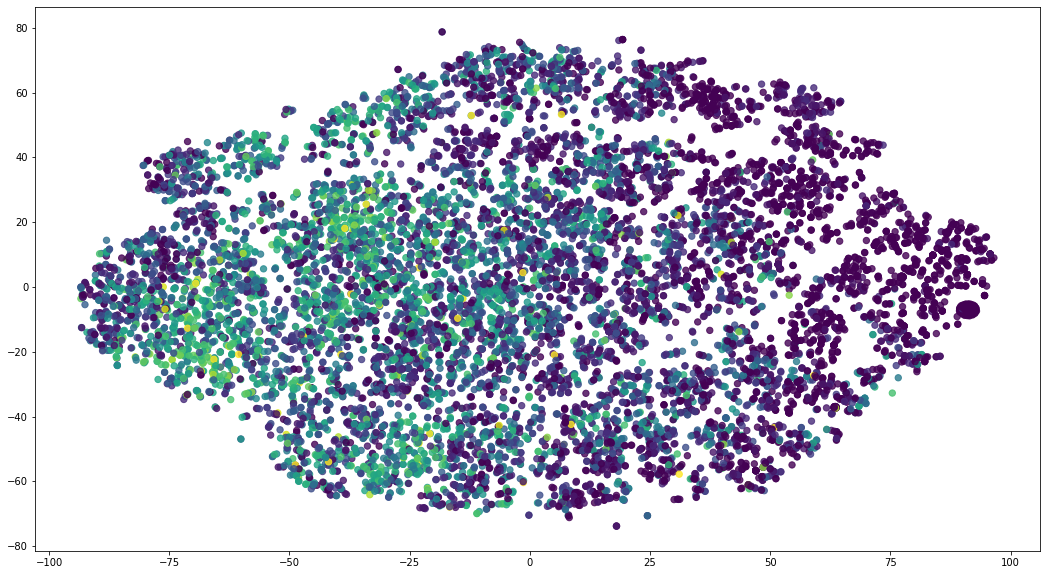

In [35]:
plt.figure(figsize=(18, 10))
plt.scatter(tformed[:, 0], tformed[:, 1], c=target.cat.codes, s=40, alpha=.8);

0-10,000       0.281877
10-20,000      0.126042
20-30,000      0.090846
30-40,000      0.068385
40-50,000      0.061439
50-60,000      0.059200
100-125,000    0.056190
60-70,000      0.048703
70-80,000      0.045307
90-100,000     0.037512
125-150,000    0.036508
80-90,000      0.033112
150-200,000    0.031182
200-250,000    0.011732
250-300,000    0.004940
300-400,000    0.003010
500,000+       0.002779
400-500,000    0.001235
Name: yearly_compensation, dtype: float64


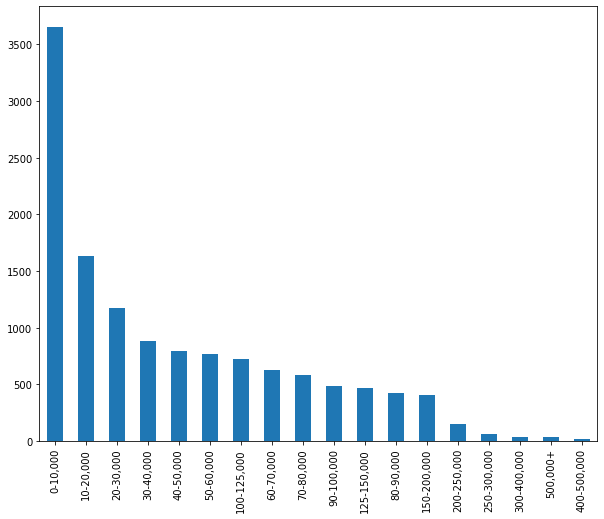

In [32]:
plt.figure(figsize=(10, 8))
print(target.value_counts(normalize=True))
target.value_counts().plot(kind='bar');

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto')

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, df_tf, target, cv=5).mean()

In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)

In [ ]:
df_tf.shape

In [ ]:
cross_val_score(rf, df_tf, target, cv=5).mean()

In [ ]:
rf.fit(df_tf, target)

In [ ]:
import numpy as np

In [ ]:
imp_sorted = sorted(rf.feature_importances_, reverse=True)
feature_names = df_tf.columns[np.argsort(rf.feature_importances_)[::-1]]

In [ ]:
for feat, imp in zip(feature_names, imp_sorted):
    print(feat, imp)